In [384]:
#New DataFrame
import pickle
from pathlib import Path
data_folder = Path('Z:\\Maxime Chevee')
file_to_open = data_folder / "master_log_4-5-6-18.pkl"
with open(file_to_open, 'rb') as f:
   master_log = pickle.load(f, encoding='latin1')

In [387]:
#Old DataFrame
import pickle
from pathlib import Path
data_folder = Path('Z:\\Maxime Chevee\Maxime 3\Analysis\Analysis OptoTagged 20180411')
file_to_open = data_folder / "master_log_lite.pkl"
with open(file_to_open, 'rb') as f:
   master_log = pickle.load(f, encoding='latin1')

In [388]:
#New Column: NR_licks_aligned_spikes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Create new column: spike-times are aligned to non-rewarded licks
new = []
for num in range(0, len(master_log.non_rewarded_licks)):
    new_col = []
    for ind in range(0, len(master_log.non_rewarded_licks[num])):
        new_col.append(np.array([np.squeeze(master_log['spike_times'][num])-master_log['non_rewarded_licks'][num][ind]]))
    new.append(new_col)
master_log['NR_licks_aligned_spikes'] = new

Text(0.5, 1.0, 'Mean of Non-Rewarded Lick-Spikes from -1to2sec in 25msec Intervals')

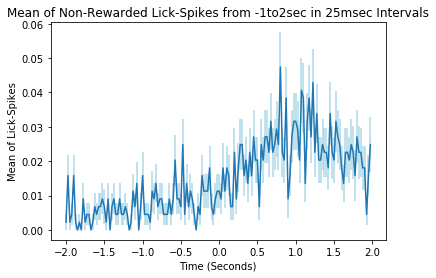

In [337]:
#Back-up
#Line graph for specific neuron
from scipy import stats
bins_mean = list(np.mean(Neuron_NR_licks_spikes, axis=0))
bins_time = list(np.arange(-2,2,0.025))
bins_error = list(stats.sem(Neuron_NR_licks_spikes, axis=0))
import matplotlib.pyplot as plt
plt.errorbar(bins_time, bins_mean, yerr=bins_error, ecolor='lightblue')
plt.xlabel('Time (Seconds)')
plt.ylabel('Mean of Lick-Spikes')
plt.title('Mean of Non-Rewarded Lick-Spikes from -1to2sec in 25msec Intervals')

C:\Users\Brown Lab\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


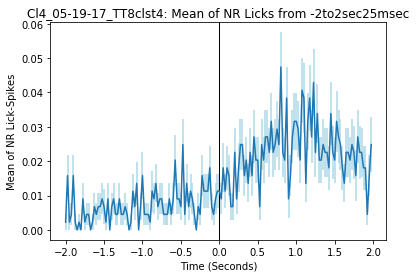

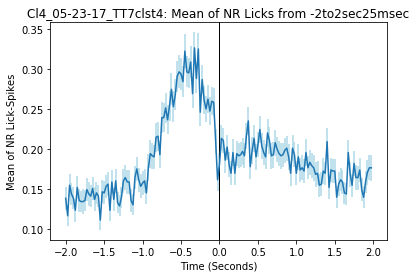

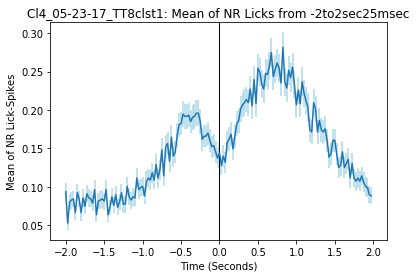

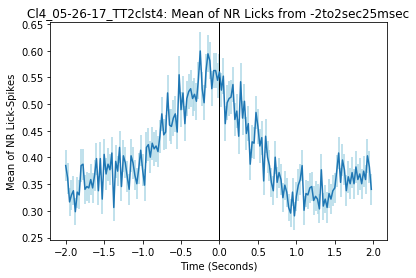

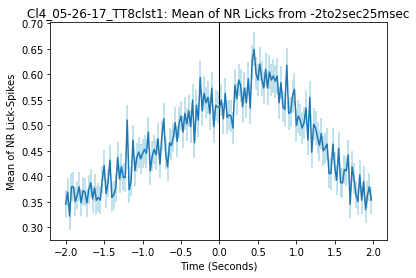

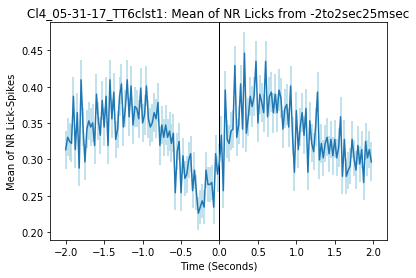

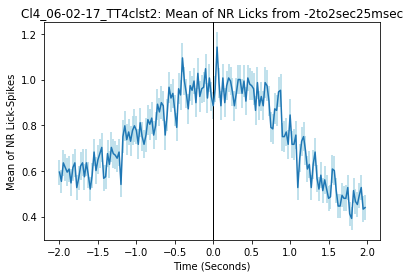

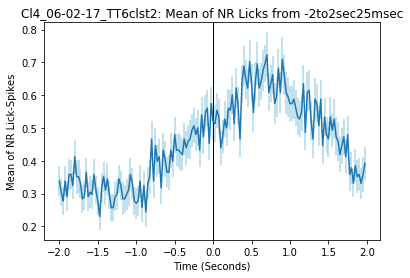

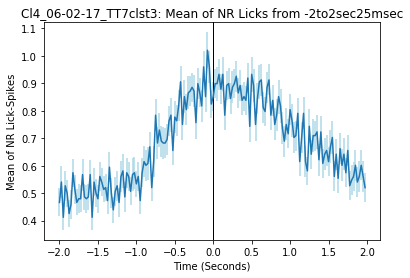

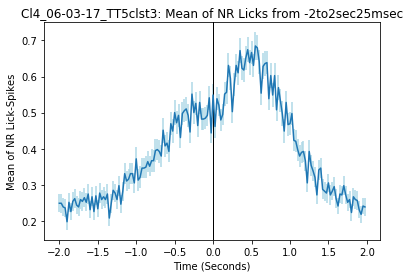

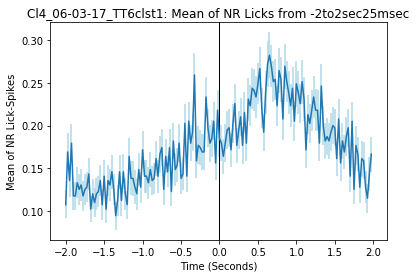

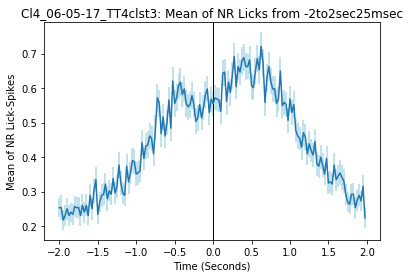

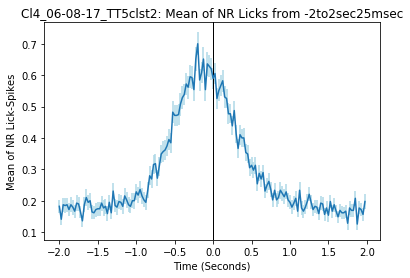

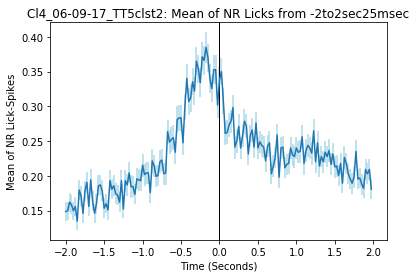

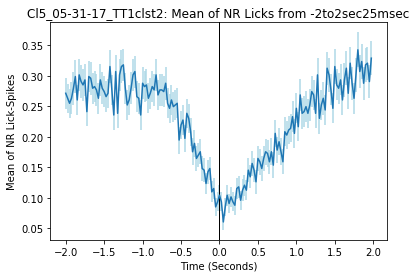

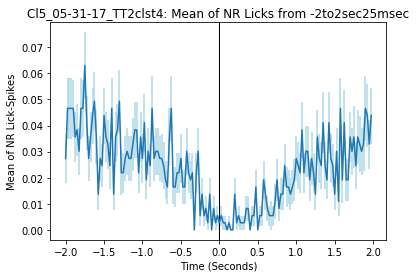

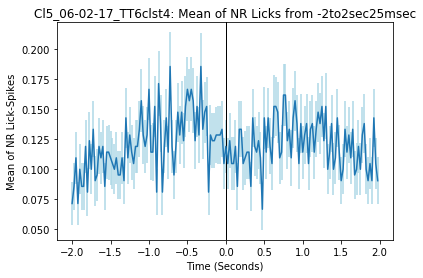

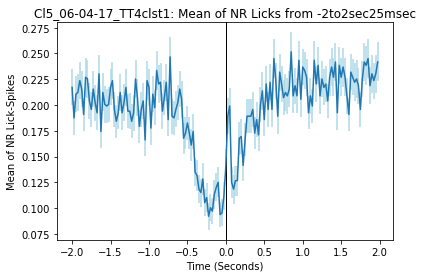

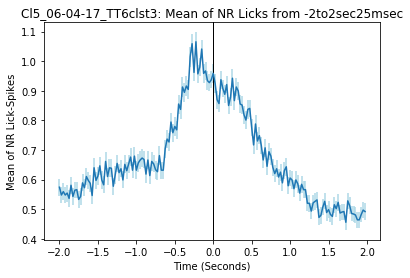

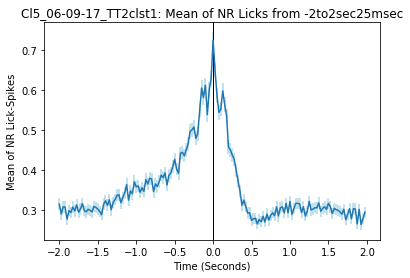

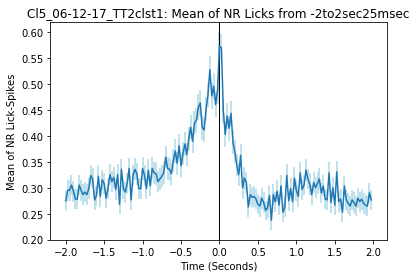

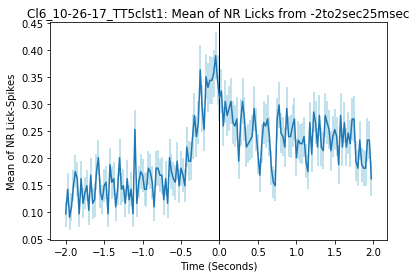

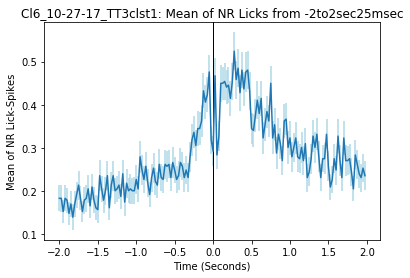

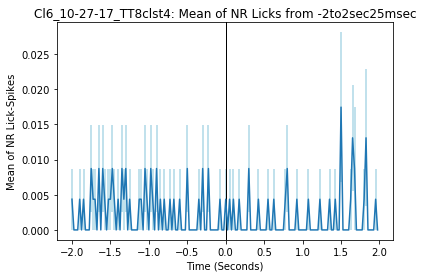

In [389]:
#Final line-graph
#Select specific neuron for histogram
#Line graph for specific neuron
#Needed checking
#Add Category filter
from scipy import stats
import matplotlib.pyplot as plt

OptoTag_neuron = list(np.unique(master_log[master_log.Category == 'OptoTag'].unit_name))
for i in range(0, len(OptoTag_neuron)):
    Neuron_NR_licks_spikes = []
    for num in range(0, len(master_log.NR_licks_aligned_spikes)):
        if ((master_log.non_rewarded_licks[num]).size != 0) & (master_log.unit_name[num] == OptoTag_neuron[i]):
            for ind in range(0, len(master_log.NR_licks_aligned_spikes[num])):
                spike_times = master_log.loc[num, 'NR_licks_aligned_spikes'][ind]
                hist = np.histogram(spike_times, bins=int((2-(-2))/0.025), range=(-2,2))[0]
                Neuron_NR_licks_spikes.append(hist)
    
    bins_mean = list(np.mean(Neuron_NR_licks_spikes, axis=0))
    bins_time = list(np.arange(-2,2,0.025))
    bins_error = list(stats.sem(Neuron_NR_licks_spikes, axis=0))
    
    fig = plt.figure(figsize=(200,4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = fig.add_subplot(1, len(OptoTag_neuron), i+1)
    ax.errorbar(bins_time, bins_mean, yerr=bins_error, ecolor = 'lightblue')
    ax.set_xlabel('Time (Seconds)')
    ax.set_ylabel('Mean of NR Lick-Spikes')
    ax.set_title(str(OptoTag_neuron[i]+': Mean of NR Licks from -2to2sec25msec'))
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    fig.savefig(str(OptoTag_neuron[i])+': Mean of NR Licks from -2to2sec25msec.pdf')

In [92]:
left_NR = []
right_NR = []
for i in (master_log.non_rewarded_licks).index:
    if np.all(list(np.squeeze(master_log.licks_left[i][0][0])) == master_log.non_rewarded_licks[i]):
        left_NR.append(master_log.non_rewarded_licks[i])
    elif np.all(master_log.licks_right[i][0][0] == master_log.non_rewarded_licks[i]):
        right_NR.append(master_log.non_rewarded_licks[i])

C:\Users\Brown Lab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


TypeError: iteration over a 0-d array